In [12]:
# -*- encoding: utf-8 -*-
import sys
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# env: windows
PATH_IMAGE = 'D:\\My_Data\\me_Docs\\Masterarbeit\\master_border_extraction\\images\\test1.png'
image_origin = cv2.imread(PATH_IMAGE)

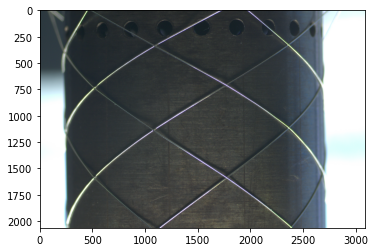

In [13]:
plt.imshow(image_origin)

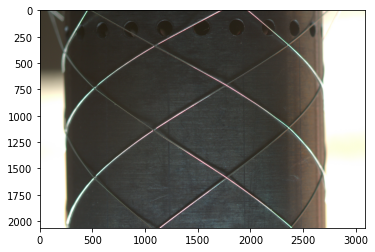

In [14]:
image = cv2.cvtColor(image_origin, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#### 1 Check: Histogramm
- HE
- CLAHE

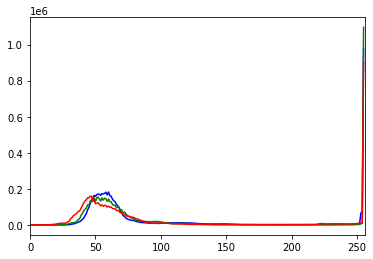

In [15]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

- test: equalization

2 Smooth
- joint bilateral filter
- guided image Filter

3 Scharpening
- color: 
    - V in HSV
    - Y in YCbCr
- grayscale

In [1]:
name = 'dinggen'
print(f'hello {name}')

hello dinggen


In [4]:
sub_dirs[1]

'2022-04-28_14-07-03'

In [6]:
src_path = os.path.join(old_path, sub_dirs[1])
dst_path = os.path.join(new_path, sub_dirs[1])
print(src_path, dst_path)

/media/dinggen/hdd1/Image/2022-04-28_14-07-03 /home/dinggen/Documents/Proj_KITMA/kitma/images/2022-04-28_14-07-03


In [7]:
os.listdir(src_path)

['0.png',
 '10007280000.png',
 '10024992000.png',
 '10042704000.png',
 '10078128027.png',
 '10095840000.png',
 '10113552000.png',
 '10131264000.png',
 '10166688027.png',
 '10184400000.png',
 '10202112000.png',
 '10237536000.png',
 '10255248027.png',
 '1027296000.png',
 '10272960000.png',
 '10290672000.png',
 '10326096000.png',
 '10343808027.png',
 '10361520000.png',
 '10396944000.png',
 '10414656000.png',
 '10432368027.png',
 '10450080000.png',
 '1045008027.png',
 '10485504000.png',
 '10503216000.png',
 '10538640000.png',
 '10556352000.png',
 '10574064000.png',
 '10591776000.png',
 '106272000.png',
 '35424000.png',
 '354240000.png',
 '35424000000.png',
 '35441712000.png',
 '35459424000.png',
 '35477136000.png',
 '35512560000.png',
 '35530272000.png',
 '35547984000.png',
 '35565696000.png',
 '3560112000.png',
 '35601120000.png',
 '35618832000.png',
 '35636544000.png',
 '35654256000.png',
 '35689680000.png',
 '35707392000.png',
 '35742816000.png',
 '35760528027.png',
 '3577824000.png',
 

In [11]:
for sub_dir in sub_dirs:
    print(f'The subdirectory is {sub_dir}.')
    src_path = os.path.join(old_path, sub_dir)
    dst_path = os.path.join(new_path, sub_dir)

    if not os.path.isdir(dst_path):
        os.makedirs(dst_path)
    
    files = [f for f in os.listdir(src_path) if f.con]
    files_num = len(files)
    # choose 20 images in each folder
    choose_files_index = list(range(0, files_num, files_num//19))

    for index in choose_files_index:
        src_file = os.path.join(src_path, files[int(index)])
        copy(src_file, dst_path)

In [12]:
lst[idx]

TypeError: list indices must be integers or slices, not list